In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users = pd.read_csv('data/user_features.csv')

user_id                    int64
user_active_degree        object
is_lowactive_period        int64
is_live_streamer           int64
is_video_author            int64
follow_user_num            int64
follow_user_num_range     object
fans_user_num              int64
fans_user_num_range       object
friend_user_num            int64
friend_user_num_range     object
register_days              int64
register_days_range       object
onehot_feat0               int64
onehot_feat1               int64
onehot_feat2               int64
onehot_feat3               int64
onehot_feat4             float64
onehot_feat5               int64
onehot_feat6               int64
onehot_feat7               int64
onehot_feat8               int64
onehot_feat9               int64
onehot_feat10              int64
onehot_feat11              int64
onehot_feat12            float64
onehot_feat13            float64
onehot_feat14            float64
onehot_feat15            float64
onehot_feat16            float64
onehot_fea

In [15]:
# Load dataset
small_matrix = pd.read_csv('data/small_matrix.csv')
item_categories = pd.read_csv('data/item_categories.csv')
item_daily_features = pd.read_csv('data/item_daily_features.csv')
social_network = pd.read_csv('data/social_network.csv')
user_features = pd.read_csv('data/user_features.csv')
kuairec_caption = pd.read_csv('data/kuairec_caption_category.csv', encoding='utf-8',
    na_values=[],
    keep_default_na=False,
    on_bad_lines='skip',   # skip problematic rows
    engine='python')

In [4]:
def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

In [4]:
# Represents the interaction between users and items
small_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


Questions to ask ourselves on the small_matrix data:
- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- What is the distribution of the interactions?
    - On days
    - On time in the days
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?

In [ ]:
# How many rows are in the dataset? (interactions)
num_rows = small_matrix.shape[0]
print(f'Number of interactions in the dataset: {num_rows}')

# What are the datatypes ?
print(small_matrix.dtypes)

# How many unique users and videos are in the dataset?
# Number of unique users
num_users = small_matrix['user_id'].nunique()
print(f'Number of unique users: {num_users}')
# Number of unique videos
num_items = small_matrix['video_id'].nunique()
print(f'Number of unique videos: {num_items}')

# What is the range of timestamps in the dataset?
# Convert to datetime
small_matrix['timestamp'] = pd.to_datetime(small_matrix['timestamp'], unit='s')
# Get min and max timestamps
min_timestamp = small_matrix['timestamp'].min()
max_timestamp = small_matrix['timestamp'].max()
print(f'Min timestamp: {min_timestamp}')
print(f'Max timestamp: {max_timestamp}')

Number of rows in the dataset: 4676570
user_id             int64
video_id            int64
play_duration       int64
video_duration      int64
time               object
date              float64
timestamp         float64
watch_ratio       float64
dtype: object
Number of unique users: 1411
Number of unique videos: 3327
Min timestamp: 2020-07-03 18:23:26.059999943
Max timestamp: 2020-09-05 15:57:23.683000088


Min interactions per user: 3295
Max interactions per user: 3327
Mean interactions per user: 3314.37


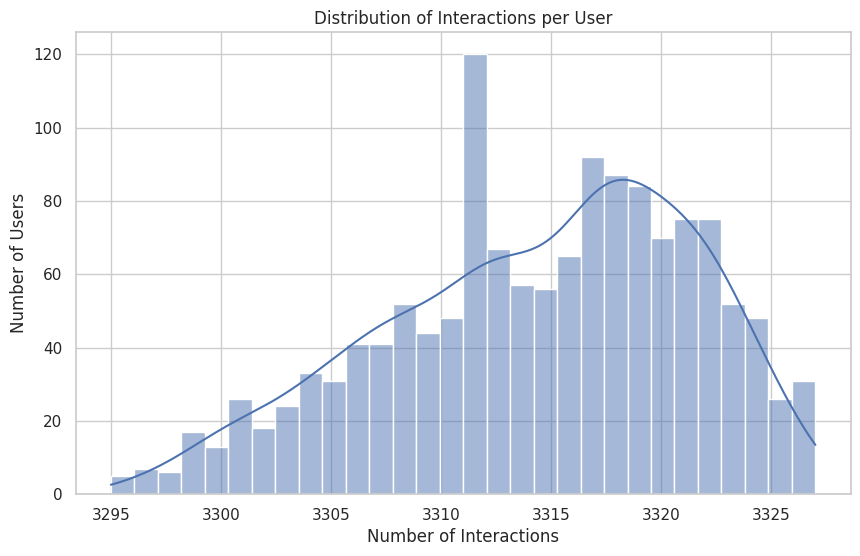

In [ ]:
# How many interactions are there per user?
# Group by user_id and count interactions
interactions_per_user = small_matrix.groupby('user_id').size()
# Get min, max, and mean
min_interactions = interactions_per_user.min()
max_interactions = interactions_per_user.max()
mean_interactions = interactions_per_user.mean()
print(f'Min interactions per user: {min_interactions}')
print(f'Max interactions per user: {max_interactions}')
print(f'Mean interactions per user: {mean_interactions:.2f}')

# Plot the distribution of interactions per user with as y-axis the number of users
# and as x-axis the number of interactions
plt.figure(figsize=(10, 6))
sns.histplot(interactions_per_user, bins=30, kde=True)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

Min interactions per video: 1315
Max interactions per video: 1411
Mean interactions per video: 1405.64


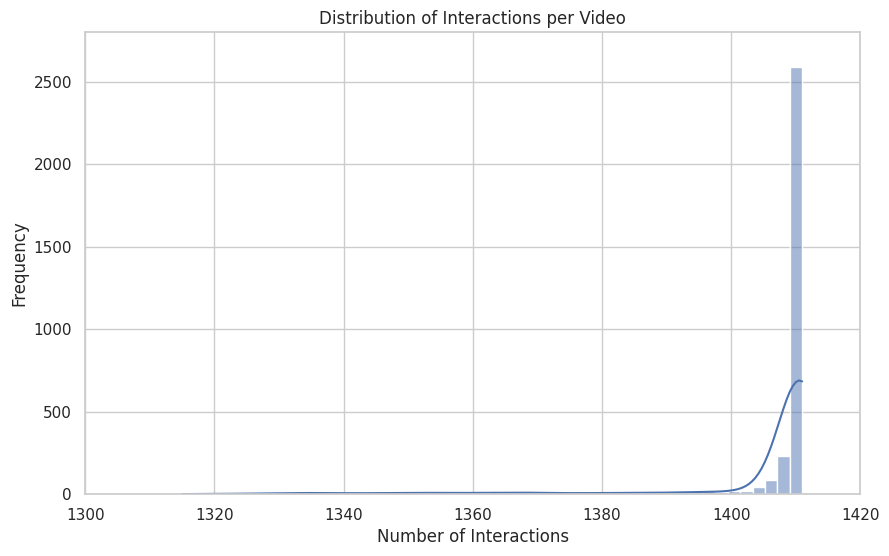

In [21]:
# How many interactions are there per video?
# Group by video_id and count interactions
interactions_per_video = small_matrix.groupby('video_id').size()
# Get min, max, and mean
min_interactions = interactions_per_video.min()
max_interactions = interactions_per_video.max()
mean_interactions = interactions_per_video.mean()
print(f'Min interactions per video: {min_interactions}')
print(f'Max interactions per video: {max_interactions}')
print(f'Mean interactions per video: {mean_interactions:.2f}')
# plot the distribution of interactions per video
plt.figure(figsize=(10, 6))
sns.histplot(interactions_per_video, bins=50, kde=True)
plt.title('Distribution of Interactions per Video')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.ylim(0, 2800)  # Limit y-axis for better visibility
plt.xlim(1300, 1420)
plt.show()

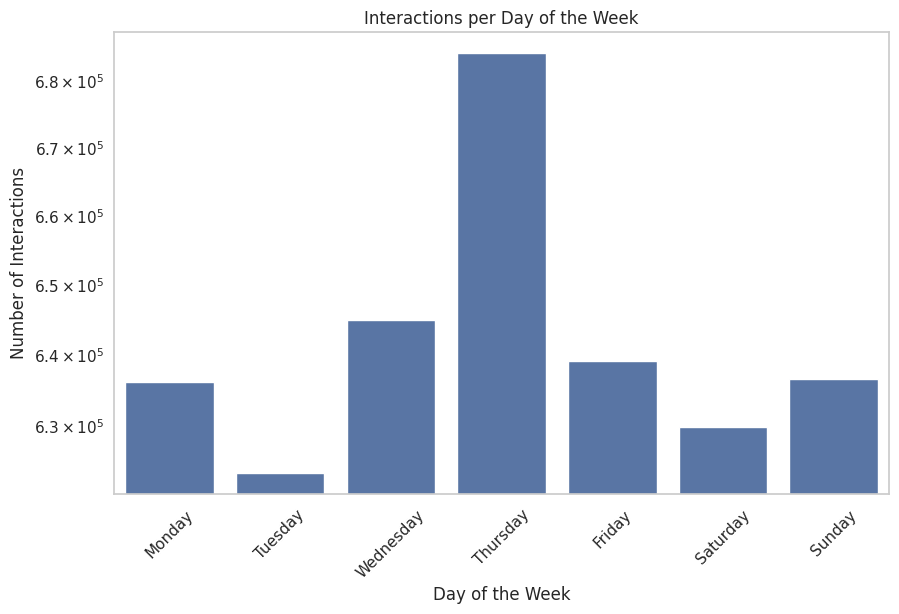

In [23]:
# How many interactions are there per day in the week ?
# Extract day of the week from timestamp
small_matrix['day_of_week'] = small_matrix['timestamp'].dt.day_name()
# Count interactions per day of the week
interactions_per_day = small_matrix.groupby('day_of_week').size()
# Sort by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
interactions_per_day = interactions_per_day.reindex(day_order)
# Plot the interactions per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=interactions_per_day.index, y=interactions_per_day.values)
plt.title('Interactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

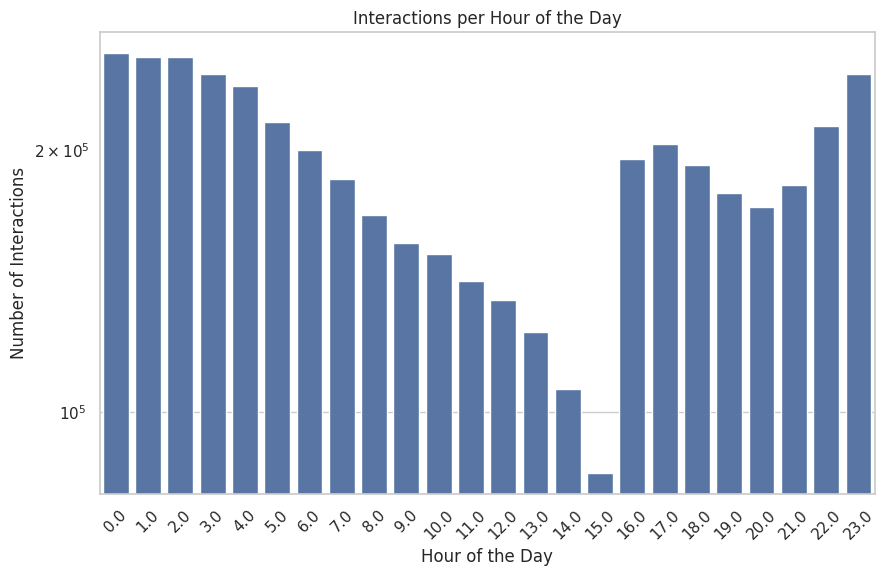

In [24]:
# How many interactions are there per hour of the day ?
# Extract hour from timestamp
small_matrix['hour'] = small_matrix['timestamp'].dt.hour
# Count interactions per hour
interactions_per_hour = small_matrix.groupby('hour').size()
# Plot the interactions per hour
plt.figure(figsize=(10, 6))
sns.barplot(x=interactions_per_hour.index, y=interactions_per_hour.values)
plt.title('Interactions per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

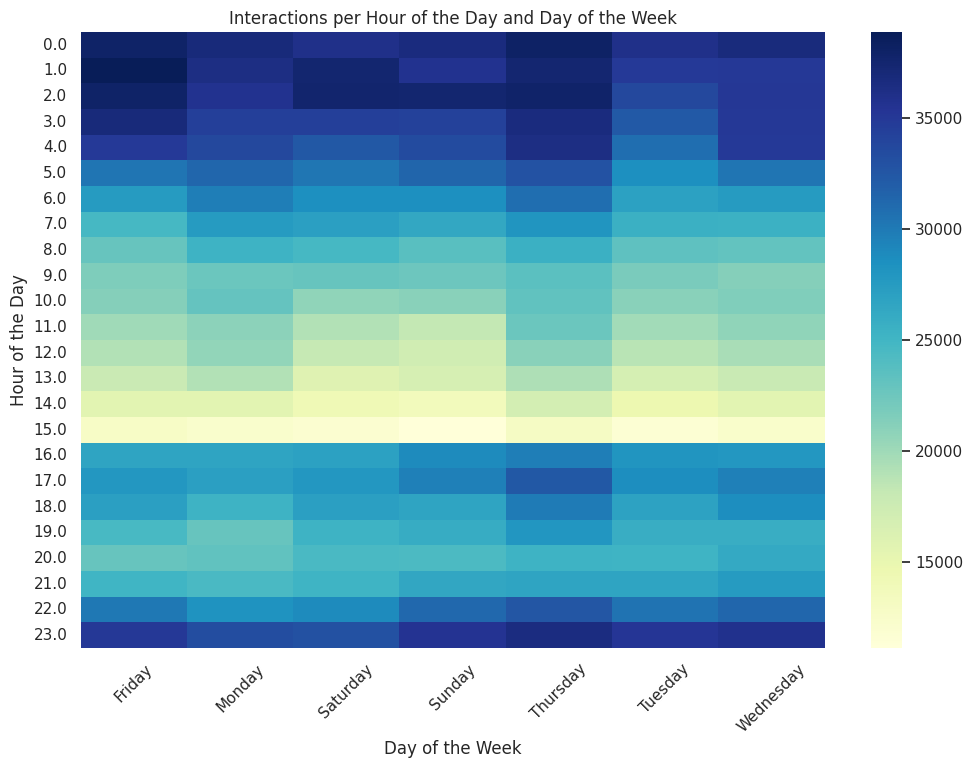

In [ ]:
# Merge the two plots above to get in one plot the number of interactions per hour of the day and the day of the week
# Create a new column for the hour of the day
test = small_matrix.copy()
test['hour'] = test['timestamp'].dt.hour
# Create a new column for the day of the week
test['day_of_week'] = test['timestamp'].dt.day_name()
# Create a pivot table
pivot_table = test.pivot_table(index='hour', columns='day_of_week', values='user_id', aggfunc='count')
# Plot the pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='d')
plt.title('Interactions per Hour of the Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Min video duration: 0.016666666666666666
Max video duration: 506.01666666666665
Mean video duration: 26.53


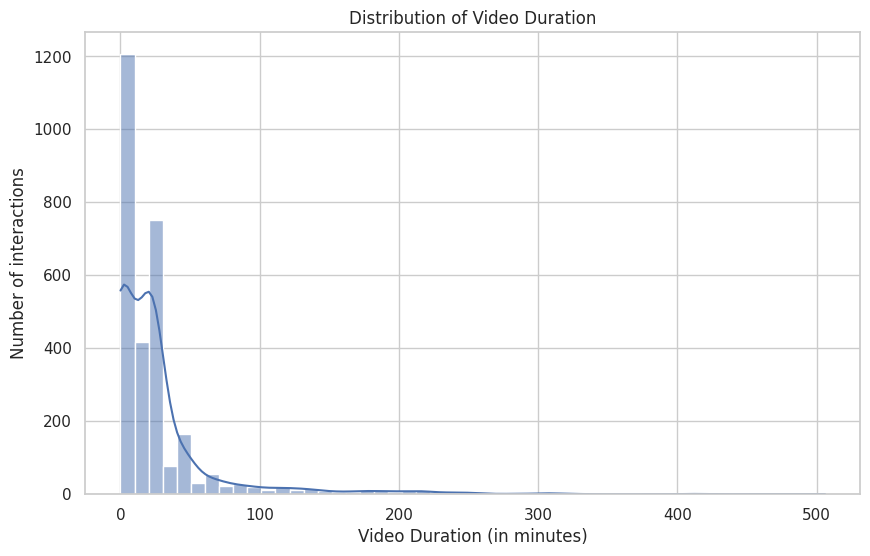

In [60]:
# Distribution of the video duration
video_duration = small_matrix.groupby(small_matrix['video_duration']).size()
# Convert to minutes
video_duration = video_duration / 60
# Get min, max, and mean
min_duration = video_duration.min()
max_duration = video_duration.max()
mean_duration = video_duration.mean()
print(f'Min video duration: {min_duration}')
print(f'Max video duration: {max_duration}')
print(f'Mean video duration: {mean_duration:.2f}')

# Plot the distribution of video duration
plt.figure(figsize=(10, 6))
sns.histplot(video_duration, bins=50, kde=True)
#plt.plot(video_duration.index, video_duration.values)
plt.title('Distribution of Video Duration')
plt.xlabel('Video Duration (in minutes)')
plt.ylabel('Number of interactions')
#plt.yscale('log')
# y axis is only positive
# plt.ylim(0, 1000)  # Limit y-axis for better visibility
plt.show()

Features that could characterize nicely a vido in this dataset are :
- the nb of interactions
- video duration
- timestamp
- watch_ratio

Min: 0.0000, Max: 3.7564, Mean: 0.5826


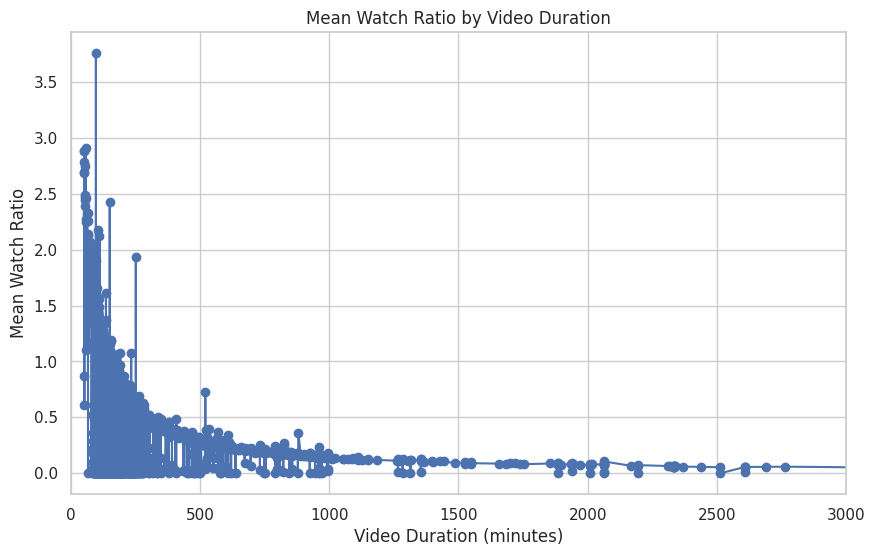

In [52]:
# Group by video_duration and calculate mean watch_ratio
grouped = small_matrix.groupby('video_duration')['watch_ratio'].mean().reset_index()

# Calculate stats on the mean watch_ratios
mean_watch_ratios = grouped['watch_ratio']
min_val = mean_watch_ratios.min()
max_val = mean_watch_ratios.max()
mean_val = mean_watch_ratios.mean()

print(f"Min: {min_val:.4f}, Max: {max_val:.4f}, Mean: {mean_val:.4f}")

grouped['video_duration'] = grouped['video_duration'] / 60  # Convert to minutes

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped['video_duration'], grouped['watch_ratio'], marker='o', linestyle='-')
# plt.plot(grouped['video_duration'], grouped['watch_ratio'], marker='o')
plt.title('Mean Watch Ratio by Video Duration')
plt.xlabel('Video Duration (minutes)')
plt.ylabel('Mean Watch Ratio')
plt.xlim(0, 3000)
plt.grid(True)
plt.show()

count    4.653780e+06
mean     8.553870e-01
std      5.952060e-01
min      0.000000e+00
25%      4.657859e-01
50%      7.662410e-01
75%      1.114060e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


/tmp/ipykernel_7207/1661492536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


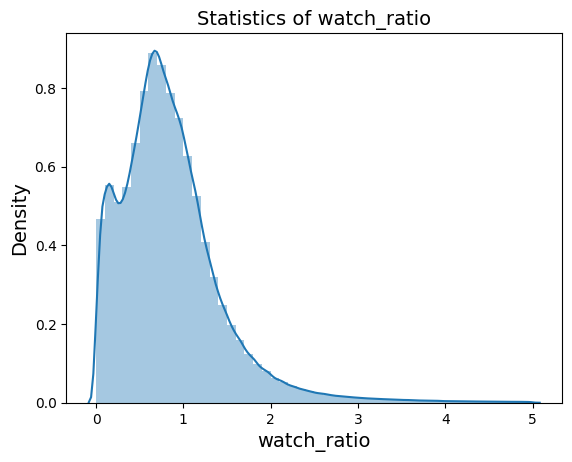

In [10]:
small_watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 5]
print(small_watch_ratio.describe())
visual_continue(small_watch_ratio)

In [8]:
# Represents the categories of items
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


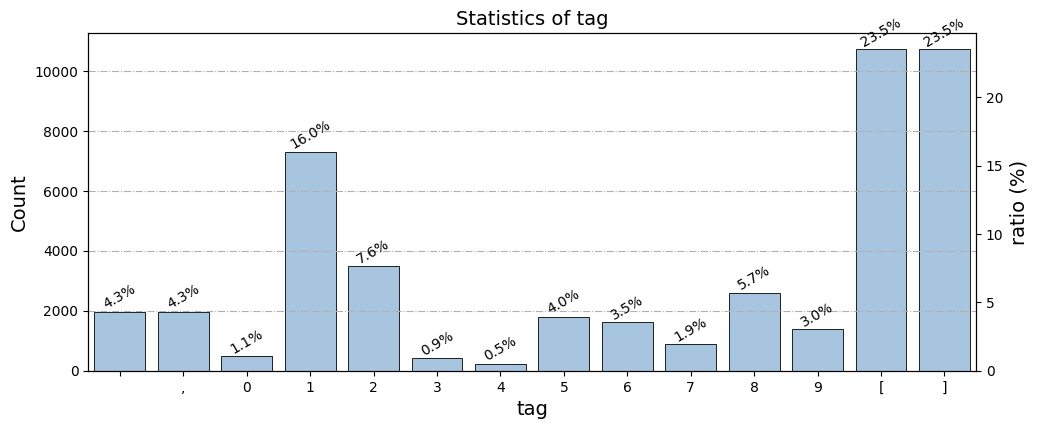

In [9]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

In [35]:
# Represents daily features of items
item_daily_features[item_daily_features["video_id"] != 0].head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
63,1,20200705,4978,NORMAL,2020-04-09,PictureSet,public,NaN,886,1015,...,17,11,0,0,13,12,NaN,NaN,NaN,NaN
64,1,20200706,4978,NORMAL,2020-04-09,PictureSet,public,NaN,886,1015,...,10,4,0,0,17,17,NaN,NaN,NaN,NaN
65,1,20200707,4978,NORMAL,2020-04-09,PictureSet,public,NaN,886,1015,...,13,11,0,0,34,31,NaN,NaN,NaN,NaN
66,1,20200708,4978,NORMAL,2020-04-09,PictureSet,public,NaN,886,1015,...,14,13,0,0,23,23,NaN,NaN,NaN,NaN
67,1,20200709,4978,NORMAL,2020-04-09,PictureSet,public,NaN,886,1015,...,17,7,0,0,30,30,NaN,NaN,NaN,NaN


Questions on the dataset:
- What are the columns and their type
- What are the columns of interest
- How many items
- How many authors



In [36]:
# What are the columns and their datatypes ?
print(item_daily_features.dtypes)

video_id                      int64
date                          int64
author_id                     int64
video_type                   object
upload_dt                    object
upload_type                  object
visible_status               object
video_duration              float64
video_width                   int64
video_height                  int64
music_id                      int64
video_tag_id                  int64
video_tag_name               object
show_cnt                      int64
show_user_num                 int64
play_cnt                      int64
play_user_num                 int64
play_duration                 int64
complete_play_cnt             int64
complete_play_user_num        int64
valid_play_cnt                int64
valid_play_user_num           int64
long_time_play_cnt            int64
long_time_play_user_num       int64
short_time_play_cnt           int64
short_time_play_user_num      int64
play_progress               float64
comment_stay_duration       

In [5]:
# import dtale
# dtale.show(item_daily_features, ignore_duplicate=True)
item_daily_features.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


📹 Video Metadata

   video_id: Unique identifier for the video.

   date: Date of the statistics in YYYYMMDD format.

   author_id: Identifier of the video's author.

   video_type: Type of the video, e.g., "NORMAL" or "AD".

   upload_dt: Date when the video was uploaded (YYYY-MM-DD).

   upload_type: Method of upload, e.g., "ShortImport", "LongImport", or "ShortCamera".

   visible_status: Visibility status of the video, such as "public".

   video_duration: Duration of the video in milliseconds.

   video_width: Width of the video in pixels.

   video_height: Height of the video in pixels.

   music_id: Identifier for the background music used in the video.

   video_tag_id: Identifier for the video's tag.

   video_tag_name: Name of the tag associated with the video.
   KuaiSAR+1ar5iv+1
   KuaiSAR+2GitHub+2KuaiRec+2

👁️ Exposure and Playback Metrics

   show_cnt: Number of times the video was shown to users on that day.

   show_user_num: Number of unique users who were shown the video.

   play_cnt: Total number of times the video was played.

   play_user_num: Number of unique users who played the video.

   play_duration: Total time (in milliseconds) the video was played.

   complete_play_cnt: Number of times the video was played to completion.

   complete_play_user_num: Number of unique users who played the video to completion.

   valid_play_cnt: Number of valid plays based on duration thresholds.

   valid_play_user_num: Number of unique users with valid plays.

   long_time_play_cnt: Number of long-duration plays based on specific criteria.

   long_time_play_user_num: Number of unique users with long-duration plays.

   short_time_play_cnt: Number of short-duration plays.

   short_time_play_user_num: Number of unique users with short-duration plays.

   play_progress: Average play progress ratio, calculated as play_duration / video_duration.
   GitHub+1KuaiRec+1

💬 Engagement Metrics

   comment_stay_duration: Total time users spent in the comments section.

   like_cnt: Total number of likes the video received.

   like_user_num: Number of unique users who liked the video.

   click_like_cnt: Number of likes resulting from double-clicks.

   double_click_cnt: Number of double-click interactions on the video.

   cancel_like_cnt: Number of likes that were canceled.

   cancel_like_user_num: Number of unique users who canceled their likes.

   comment_cnt: Total number of comments made on the video.

   comment_user_num: Number of unique users who commented.

   direct_comment_cnt: Number of direct (top-level) comments.

   reply_comment_cnt: Number of reply (nested) comments.

   delete_comment_cnt: Number of comments that were deleted.

   delete_comment_user_num: Number of unique users who deleted their comments.

   comment_like_cnt: Number of likes on comments.

   comment_like_user_num: Number of unique users who liked comments.
   GitHub

👥 Social Interaction Metrics

   follow_cnt: Number of new follows generated from the video.

   follow_user_num: Number of unique users who followed the author due to the video.

   cancel_follow_cnt: Number of unfollows resulting from the video.

   cancel_follow_user_num: Number of unique users who unfollowed the author due to the video.
   GitHub

📤 Sharing and Feedback Metrics

   share_cnt: Number of times the video was shared.

   share_user_num: Number of unique users who shared the video.

   download_cnt: Number of times the video was downloaded.

   download_user_num: Number of unique users who downloaded the video.

   report_cnt: Number of times the video was reported.

   report_user_num: Number of unique users who reported the video.

   reduce_similar_cnt: Number of times users chose to reduce similar content.

   reduce_similar_user_num: Number of unique users who opted to reduce similar content.

   collect_cnt: Number of times the video was added to favorites.

   collect_user_num: Number of unique users who added the video to favorites.

   cancel_collect_cnt: Number of times the video was removed from favorites.

   cancel_collect_user_num: Number of unique users who removed the video from favorites.

For each of the column the objectiv is to determine if it is a intresting feature to describe our videos. We are goin to look the distribution of the values of the column and their differents values to answer to this question.

In [16]:
# Get the range of dates of the dataset, the dates are in format YYYYMMDD
# datetime_object = datetime.strptime(date_string, "%Y%m%d")
item_daily_features['date'] = item_daily_features['date'].astype(str)
item_daily_features['date'] = pd.to_datetime(item_daily_features['date'], format='%Y%m%d')
min_date = item_daily_features['date'].min()
max_date = item_daily_features['date'].max()
print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

# print(item_daily_features.describe())

Min date: 2020-07-05 00:00:00
Max date: 2020-09-05 00:00:00


In [22]:
print("Study of the video metadata of the dataset\n")

# Total number of rows
num_rows = item_daily_features.shape[0]
print(f'Number of rows in item_daily_features: {num_rows}')
unique_authors = item_daily_features['author_id'].nunique()
print(f'Number of unique authors: {unique_authors}')
unique_video_type = item_daily_features['video_type'].nunique()
print(f'Number of unique video types: {unique_video_type}')
# Get upload_dt range
min_upload_dt = item_daily_features['upload_dt'].min()
max_upload_dt = item_daily_features['upload_dt'].max()
print(f'Min upload_dt: {min_upload_dt}')
print(f'Max upload_dt: {max_upload_dt}')
print(f'Number of unique upload_dt: {item_daily_features["upload_dt"].nunique()}')
unique_video_status = item_daily_features['visible_status'].nunique()
print(f'Number of unique video statuses: {unique_video_status}')
unique_music_id = item_daily_features['music_id'].nunique()
print(f'Number of unique music ids: {unique_music_id}')


Study of the video metadata of the dataset

Number of rows in item_daily_features: 343341
Number of unique authors: 8369
Number of unique video types: 2
Min upload_dt: 2019-05-18
Max upload_dt: 2020-09-05
Number of unique upload_dt: 160
Number of unique video statuses: 3
Number of unique music ids: 8495


In [ ]:
print("Study the exposure and the playback metrics of the dataset\n")
# Total number of rows
num_rows = item_daily_features.shape[0]
print(f'Number of rows in item_daily_features: {num_rows}')
# Ides of features
exposure_features = ['exposure_ratio'] # show_user_num / play_user_num

It matches the ranfe date of small matrix (we will be able to merge on their date then)

The columns to select for content_based are:
- video_id
- date
- author_id
- video_type
- upload_dt
- visible_status
- video_width
- video_height
- music_id
- show_cnt
- play_cnt
- play_duration
- valid_play_cnt
- long_time_play_cnt
- short_time_play_cnt
- complete_play_cnt
- comment_stay_duration
- like_cnt
- cancel_like_cnt
- comment_cnt
- delete_comment_cnt
- comment_like_cnt
- share_cnt
- download_cnt
- report_cnt

In [ ]:
# Drop all columns that are not above
item_daily_features = item_daily_features.drop(columns=["upload_type", "video_duration", "video_tag_id", "video_tag_name", "show_user_num", "play_user_num", "complete_play_user_num", "valid_play_user_num", "long_time_play_user_num", "short_time_play_user_num", ""])

In [ ]:
# Represents the social network of users
social_network.head()

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


In [ ]:
# Represents features of users
user_features.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Represents the caption categories for Kuairec
kuairec_caption.head()

,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,1,UNKNOWN,,[],27.0,高新数码,-124.0,UNKNOWN,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装
